In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

In [65]:
data=pd.read_csv('C:/Data Sets/Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [66]:
data.shape

(754, 7)

In [67]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       ' Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                      740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [69]:
data.isna().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
 Estimated Employed                        14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [70]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [71]:
data['Area']

0      Rural
1      Rural
2      Rural
3      Rural
4      Rural
       ...  
749    Urban
750    Urban
751    Urban
752    Urban
753    Urban
Name: Area, Length: 754, dtype: object

In [72]:
data.nunique()

Region                                      28
Date                                        14
Frequency                                    2
Estimated Unemployment Rate (%)            624
 Estimated Employed                        740
Estimated Labour Participation Rate (%)    626
Area                                         2
dtype: int64

In [73]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [74]:
data['Region'].value_counts().sort_values(ascending=True)

Chandigarh          12
Sikkim              17
Jammu & Kashmir     21
Goa                 24
Puducherry          26
Assam               26
Uttarakhand         27
Meghalaya           27
Bihar               28
Chhattisgarh        28
Delhi               28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Andhra Pradesh      28
Maharashtra         28
Madhya Pradesh      28
Odisha              28
Punjab              28
Rajasthan           28
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
West Bengal         28
Kerala              28
Karnataka           28
Jharkhand           28
Name: Region, dtype: int64

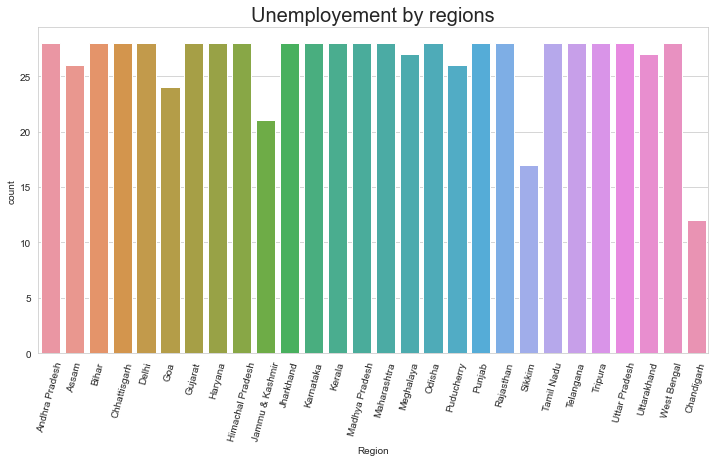

In [75]:
plt.figure(figsize=(12,6))
plt.title('Unemployement by regions',size=20)
sns.countplot(data['Region'])
plt.xticks(rotation=75)
plt.show()

In [77]:
data['Date'] = pd.to_datetime(data['Date'])

In [78]:
data["Month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

In [79]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,2019.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,2019.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,2019.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,2019.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,2019.0
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2.0,2020.0
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3.0,2020.0
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4.0,2020.0
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5.0,2020.0


In [85]:
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [87]:
df_stats = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [91]:
region_stats=data.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.324791,1.019285e+07,44.464819
1,Urban,13.166614,4.388626e+06,40.901365


<AxesSubplot:>

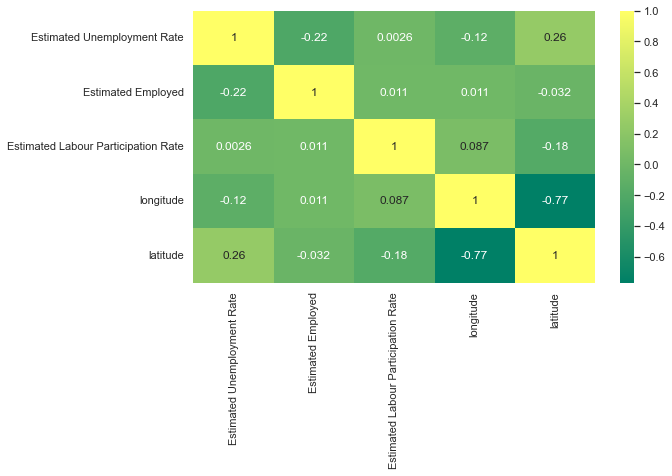

In [96]:
heat_maps = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(9, 5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

<AxesSubplot:title={'center':'Indian Unemployment'}, xlabel='Estimated Unemployment Rate', ylabel='Count'>

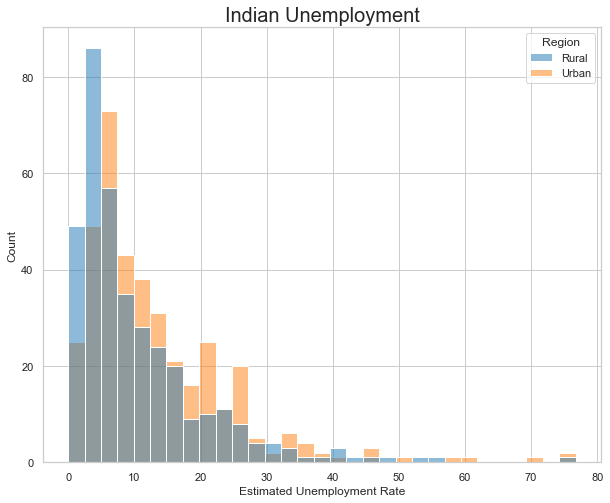

In [101]:
plt.figure(figsize=(10,8))
plt.title('Indian Unemployment',size=20)
sns.histplot(x=data['Estimated Unemployment Rate'],hue=data['Region'])

In [107]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [114]:
plot_ump = data[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [118]:
unemplo_df = data[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()